In [16]:
# Import Libraries
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter


headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

In [38]:
# Build a CSV file to store data
csv_file = open('SkinnyTaste.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Name' , 'Address' , 'Distance (miles from centre)', 'Price (USD)', 'Score', 'Rating', 'Summary', 'Images' ])

83

In [39]:
# Get the target data from the website

offset = 0

for page in range (0,3):
  url = 'https://www.booking.com/searchresults.en-gb.html?ss=Paris&ssne=Paris&ssne_untouched=Paris&label=gen173nr-1FCAEoggI46AdIM1gEaEiIAQGYAQm4AQfIAQzYAQHoAQH4AQuIAgGoAgO4AvuevpkGwAIB0gIkYTQzODdhNDItYThkNy00MDVmLWExYTctNDA0NDMxYWU4ZmYz2AIG4AIB&sid=c5e52c4c73e6d4e626d6c8a8883ff0e5&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-1456928&dest_type=city&checkin=2022-10-30&checkout=2022-10-31&group_adults=1&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset=' + str(offset)
  offset +=25
  response=requests.get(url,headers=headers).text


  soup=BeautifulSoup(response,'lxml')


  for Post in soup.find_all('div', class_= 'd20f4628d0'):
    name = Post.find('div', class_ = 'fcab3ed991 a23c043802').get_text()

    distance = Post.find('span',{'data-testid': 'distance'}).text.split()[0]

    price = Post.find('span', class_ = 'fcab3ed991 bd73d13072').get_text().split('$')[1]
  
    rating = 0
    for rate in Post.find_all('span', class_ = 'b6dc9a9e69 adc357e4f1 fe621d6382'):
      rating += 1 

    score = Post.find('div', class_ = 'b5cd09854e d10a6220b4').get_text()

    link = Post.find('a', class_ = 'e13098a59f')['href']

    secondary_response=requests.get(link).text

    secondary_soup=BeautifulSoup(secondary_response,'lxml')
    pics_link = []
    summary = []

    div_req = secondary_soup.find('div', class_ = 'clearfix bh-photo-grid bh-photo-grid--space-down fix-score-hover-opacity')

    try:
      for pic_link in div_req.find_all('img', class_ = "hide"):
        pics_link.append(pic_link['src'])
    except:
      pics_link.append(None)
    div_summary = secondary_soup.find('div', {"id": "property_description_content"})

    for sum in div_summary.find_all('p'):
      summary.append(sum.text)

    total_summary = '\n'.join(summary)

    address = secondary_soup.find('span', class_ = ' hp_address_subtitle js-hp_address_subtitle jq_tooltip ').get_text()

    
    # Write to CSV file
    csv_writer.writerow([name, address, distance, price , score , rating , total_summary, pics_link])




In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [ ]:
import time 
for page in range(1,4):
  gg = driver.get('https://www.zenhotels.com/hotel/france/paris/?q=2734&dates=30.10.2022-31.10.2022&guests=1&page='+ str(page) +'&price=one&type_group=hotel&sid=ae40a212-a031-4d27-b1b0-04be700608b0')
  time.sleep(5)

  page = driver.page_source
  zen_soup = BeautifulSoup(page, features='html.parser')
  # print(zen_soup.prettify())

  for Post in zen_soup.find_all('div', class_= 'hotel-wrapper'):
    zen_name = Post.find('a', class_ = 'zen-hotelcard-name-link'). text

    
    try: 
      distance = Post.find('span', class_ = 'zen-hotelcard-location-value').get_text().split('&')[0]
      if (distance.split()[1] == 'km'):
        zen_distance = float (distance.split()[0])
      else:
        zen_distance = "{:.1f}".format(((float (distance.split()[0])) / 1000))
    except:
      zen_distance = None

    zen_price = Post.find('div', class_ = 'zen-hotelcard-rate-price-value').find_next('span').find_next('span').text.split('$')[0]

    zen_rating = 0
    for rate in Post.find_all('div', class_ = 'zen-ui-stars-star'):
      zen_rating += 1 


    zen_link = Post.find('a', class_ = 'zen-hotelcard-name-link')['href']

    zen_url_link = 'https://www.zenhotels.com' + zen_link
    gg = driver.get(zen_url_link)

    second_page = driver.page_source
    second_zen_soup = BeautifulSoup(second_page, features='html.parser')

    try: 
      zen_score = second_zen_soup.find('span', class_ = 'zen-roomspage-reviews-rating-value').get_text()
    except:
      zen_score = None

    zen_pics_link = []
    try:
      for image in second_zen_soup.find_all('img', class_ = 'zen-tablet-gallery-thumb-img'):
        zen_pics_link.append(image['src'])
    except:
      zen_pics_link.append(None)

    try: 
      zen_address = second_zen_soup.find('span', class_ = 'zen-roomspage-address').get_text()
    except:
      zen_address = None

    try: 
      zen_summary = second_zen_soup.find('div', class_ = 'zen-roomspage-about-item zen-roomspage-about-item-about').get_text()
    except:
      zen_summary = None
     
    
    csv_writer.writerow([zen_name, zen_address, zen_distance, zen_price , zen_score , zen_rating , zen_summary, zen_pics_link])

    


In [41]:
import time

offset = 0

for page in range (0,3):
  url = 'https://book.cheapoair.com/searchresults.en-us.html?label=desktop-1461715-click&aid=1461715&ss=Paris&checkin_month=10&checkin_monthday=30&checkin_year=2022&checkout_month=10&checkout_monthday=31&checkout_year=2022&group_adults=1&group_children=0&no_rooms=1&offset=' + str(offset)
  offset +=25
  response=requests.get(url,headers=headers).text


  soup=BeautifulSoup(response,'lxml')


  for Post in soup.find_all('div', class_= 'd20f4628d0'):
    name = Post.find('div', class_ = 'fcab3ed991 a23c043802').get_text()

    distance = Post.find('span',{'data-testid': 'distance'}).text.split()[0]

    price = Post.find('span', class_ = 'fcab3ed991 bd73d13072').get_text().split('$')[1]
  
    rating = 0
    for rate in Post.find_all('span', class_ = 'b6dc9a9e69 adc357e4f1 fe621d6382'):
      rating += 1 

    score = Post.find('div', class_ = 'b5cd09854e d10a6220b4').get_text()

    link = Post.find('a', class_ = 'e13098a59f')['href']

    secondary_response=requests.get(link).text

    secondary_soup=BeautifulSoup(secondary_response,'lxml')
    pics_link = []
    summary = []

    div_req = secondary_soup.find('div', class_ = 'clearfix bh-photo-grid bh-photo-grid--space-down fix-score-hover-opacity')

    try:
      for pic_link in div_req.find_all('img', class_ = "hide"):
        pics_link.append(pic_link['src'])
    except:
      pics_link.append(None)
    div_summary = secondary_soup.find('div', {"id": "property_description_content"})

    for sum in div_summary.find_all('p'):
      summary.append(sum.text)

    total_summary = '\n'.join(summary)

    address = secondary_soup.find('span', class_ = ' hp_address_subtitle js-hp_address_subtitle jq_tooltip ').get_text()

    # Write to CSV file
    csv_writer.writerow([name, address, distance, price , score , rating , total_summary, pics_link])

csv_file.close()


Text(0.5, 1.0, 'The number of each Ratings')

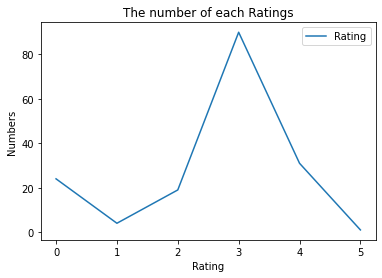

In [97]:
from operator import itemgetter
file_name = "SkinnyTaste.csv"
file_name_output = "SkinnyTasteWithoutDup.csv"

df = pd.read_csv(file_name, sep=",")

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False) 

df = pd.read_csv(file_name_output, sep=",")

df.groupby(['Rating'])['Rating'].count().plot(legend=True)
plt.ylabel('Numbers')
plt.title('The number of each Ratings')


Text(0.5, 1.0, 'The Number of each Scores')

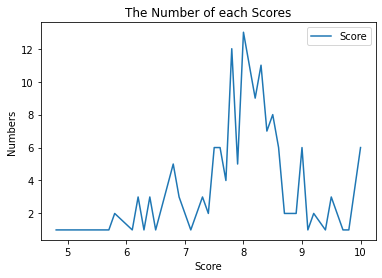

In [98]:
df.groupby(['Score'])['Score'].count().plot(legend=True)
plt.ylabel('Numbers')
plt.title('The Number of each Scores')


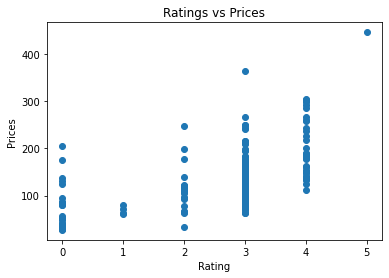

In [99]:
x = df['Rating']
y = df['Price (USD)']

plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Prices')
plt.title('Ratings vs Prices')
plt.show()

0.531527291681025


Text(0.5, 1.0, 'Correlation of Price and Score')

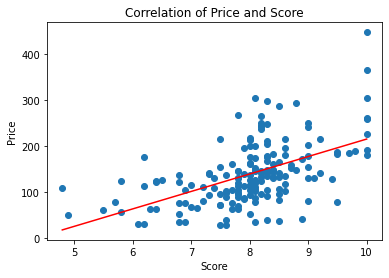

In [103]:
import sklearn
import numpy as np

df = df.replace('', np.nan)

df = df.ffill().bfill()

x = df['Score']
y = df['Price (USD)']

correlation = y.corr(x)
print(correlation)
 
# plot the data
plt.scatter(x, y)
 
# fits the best fitting line to the data
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
 
# Labelling axes
plt.xlabel('Score')
plt.ylabel('Price')
plt.title('Correlation of Price and Score')

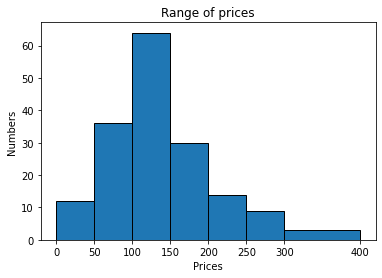

In [101]:
bins= [0, 50, 100, 150 , 200, 250, 300 , 400]
plt.hist(price, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel("Prices")
plt.ylabel("Numbers")
plt.title('Range of prices')
plt.show()

In [102]:

# Get user promts
print('                    Welcome to BookingInfo')
print('This platform is meant to give you the best selection of Hotel options')
print('                   all based on YOUR needs!')
print()
min = input('What is the minimum price you are looking for? (Based on USD) ')
max = input('What is the maximum price you are looking for? (Based on USD) ')
min_point = input('What is the minimum review score you are looking for?(Out of 10) ')
min_rating_point = input('What is the minimum rating you are looking for? (Out of 5) ')
max_distance = input('What is the maximum distance you are looking for? (Based on miles) ')

print()
print('      You want a hotel that has a price range of [' + min + ', ' + str(max) + '] USD')
print('             and for its minimum review score to be  [' + str(min_point) + '/10]')
print('             and for its minimum rating to be  [' + str(min_rating_point) + '/5]')
print('             and for its maximum distance to be  [' + str(max_distance) + ' miles]')
print('          Here is our Hotels that fit your choices')
print()


#read csv, and split on "," the line
csv_file = csv.reader(open('SkinnyTasteWithoutDup.csv', "r"), delimiter=",")
first_row = next(csv_file)

#loop through the csv list
hotels = []
for row in csv_file:
    #if current rows 2nd value is equal to input, print that row
    # if int(row[3]) >= int(min) and int(row[3]) <= int(max) and float(row[4]) >= float(min_point) and int(row[5]) >= int(min_rating_point) and float(row[2])<= float(max_distance):
    if row[3] >= min and row[3] <= max and row[4] >= min_point and row[5] >= min_rating_point and row[2] <= max_distance  :
      hotels.append(row)

sorted_hotels = sorted(hotels, key = itemgetter(2))

print('================================\n')
for i in range(len(sorted_hotels)-1): 
  print( sorted_hotels[i][0]+ ',\n' )
print('================================\n')

name = input('Please put the name of the Hotel to get more information: ')

for j in range(len(sorted_hotels)-1):
  if (name.lower() == sorted_hotels[j][0].lower()):
    print('==================================================================================================================================\n')
    print('Name: ' + sorted_hotels[j][0] + ',\n' + 'Address: ' + sorted_hotels[j][1]  + 'Distance from the center: ' + sorted_hotels[j][2] + ' miles,\n' + 'Price: ' + sorted_hotels[j][3] + ' USD,\n' + 'Review Score: ' + sorted_hotels[j][4] + '/10,\n' + 'Star Rating: ' + sorted_hotels[j][5] + '/5,\n' + 'Summary: ' + sorted_hotels[i][6] + ',\n' + 'Images: ' + sorted_hotels[j][7] + '\n')
    print('==================================================================================================================================\n')



                    Welcome to BookingInfo
This platform is meant to give you the best selection of Hotel options
                   all based on YOUR needs!

What is the minimum price you are looking for? (Based on USD) 100
What is the maximum price you are looking for? (Based on USD) 200
What is the minimum review score you are looking for?(Out of 10) 6
What is the minimum rating you are looking for? (Out of 5) 3
What is the maximum distance you are looking for? (Based on miles) 2

      You want a hotel that has a price range of [100, 200] USD
             and for its minimum review score to be  [6/10]
             and for its minimum rating to be  [3/5]
             and for its maximum distance to be  [2 miles]
          Here is our Hotels that fit your choices


France Louvre,

Hôtel Elixir,

Hôtel du Levant,

Hôtel Albe Saint Michel,

Hotel Saint Honore,


Hôtel Arc Porte D'Orleans
,


Aparthotel Adagio access Paris Clichy
,


Grand Hotel Dechampaigne
,

Hôtel Du Vieux Saule,

Hô